#  O JOGO DE SUCESSO

Para identificar os jogos que mais vendem na loja online Ice e para planejar a campanha publicitária para o próximo ano, o presente projeto visa analisar as avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos que estão disponíveis em fontes abertas, identificando padrões que determinam se um jogo tem sucesso ou não.

# Iniciação, Carregamento de Dados e Exploração de Dados

Carregaremos as bibliotecas e os dados do projeto para analisar as informações gerais. Inicialmente com os dados iremos observar as 10 linhas de cada conjunto de dados.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [10]:
#df = pd.read_csv("C:\\Users\\tha_s\\Downloads\\games.csv")
df = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv")

In [11]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [14]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Inicialmente, pudemos verificar que o nome das colunas possui letras maiúsculas e minúsculas e arrumamos a grafia dos nomes das colunas para que fiquem todas em letra minúscula. Também identificamos que os dados referentes a data na coluna year_of_release se apresentavam como float64, e para que possamos analisá-los, iremos corrigi-los para que os dados constem como datetime. Verificamos que há dados ausentes nas colunas name, Year_of_Release, genre, Critic_Score, User_Score e Rating. Quanto aos valores ausentes nas colunas name e genre, por se tratarem de uma quantidade pequena em relação ao conjunto de dados geral, iremos ignorá-los. Quanto às demais colunas com valores ausentes, iremos analisá-las e criaremos um tópico para decidirmos como iremos tratá-los.

# Valores Ausentes

Como já informado anteriormente, as colunas year_of_release, critic_score, user_score e rating possuem valores ausentes. Agora, neste tópico, iremos decidir como tratá-los.

**Valores Ausentes em year_of_release**

In [15]:
df['year_of_release'].fillna(value=0, inplace=True)

In [16]:
df['year_of_release'].isna().sum()

0

Para a coluna year_of_release, não poderíamos retirar as linhas com os valores ausentes, pois isso poderia influenciar no resultado do estudo. Assim, preenchemos os valores ausentes com o valor 0.

**Valores ausentes em critic_score**

Para os valores ausentes em critic_score, decidimos não fazer nenhuma substituição. Não seria uma boa alternativa substituir os dados pela média, por exemplo, já que as críticas são dadas de acordo com o jogo, e no presente estudo a lista de jogos é extensa. Preencher valores nulos com valores médios poderia distorcer a distribuição dos dados. A ausência de dados pode ter ocorrido porque a avaliação não foi registrada corretamente ou foi perdida durante o processo de coleta de dados.

**Valores ausentes em user_score**

In [17]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [18]:
df['user_score'].replace({'tbd':np.nan}, inplace=True)

In [19]:
df['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [20]:
df = df.dropna(subset=['user_score'])
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


Ao checar os valores presentes na coluna user_score, observamos que há um valor "tbd" (to be determined). Com os valores "tbd", fizemos uma substituição para NaN, pois seria mais fácil para trabalharmos com esse valor. Por fim, com todos os valores ausentes, decidimos não preenchê-los por entender que não seria a melhor alternativa, pois preenchê-los poderia influenciar no resultado do estudo. 

Porém, durante a análise, para podermos realizar algumas análises no conjunto de dados, usamos o método df.dropna(subset=[]) na coluna user_score.

**Valores ausentes em rating**

In [21]:
df['genre'].value_counts()

Action          1830
Sports          1103
Shooter          924
Role-Playing     743
Racing           641
Misc             439
Platform         428
Fighting         399
Simulation       344
Strategy         311
Adventure        300
Puzzle           128
Name: genre, dtype: int64

In [22]:
aventura = df.loc[df['genre'] == 'Adventure']
aventura

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
160,Assassin's Creed,X360,2007.0,Adventure,3.28,1.64,0.07,0.56,81.0,7.7,M
219,Assassin's Creed,PS3,2007.0,Adventure,1.91,2.00,0.09,0.82,81.0,7.3,M
433,L.A. Noire,PS3,2011.0,Adventure,1.27,1.29,0.12,0.49,89.0,7.7,M
437,Club Penguin: Elite Penguin Force,DS,2008.0,Adventure,1.87,0.97,0.00,0.30,NaN,8,E
463,Heavy Rain,PS3,2010.0,Adventure,1.29,1.21,0.06,0.47,87.0,7.7,M
...,...,...,...,...,...,...,...,...,...,...,...
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016.0,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN
16532,Alone in the Dark,PC,2008.0,Adventure,0.00,0.01,0.00,0.00,55.0,5.7,M
16618,Xblaze: Lost Memories,PSV,2015.0,Adventure,0.01,0.00,0.00,0.00,NaN,7,M


In [23]:
strategy = df.loc[df['genre'] == 'Strategy']
strategy

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,2.57,1.68,0.00,0.58,93.0,8.2,T
582,Halo Wars,X360,2009.0,Strategy,1.54,0.80,0.04,0.24,82.0,7.2,T
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
803,Sim Theme Park,PC,1998.0,Strategy,2.04,0.04,0.00,0.00,NaN,8.3,E
1078,Sid Meier's Civilization V,PC,2010.0,Strategy,0.98,0.52,0.00,0.17,90.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16453,Act of Aggression,PC,2015.0,Strategy,0.00,0.01,0.00,0.00,71.0,7.1,NaN
16569,The Eye of Judgment: Legends,PSP,2010.0,Strategy,0.00,0.00,0.01,0.00,69.0,7.9,E10+
16640,Hospital Tycoon,PC,2007.0,Strategy,0.00,0.01,0.00,0.00,51.0,3.8,E10+
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


In [24]:
def rating_genre(row):
    genre = row['genre']
    rating = row['rating']
    
    e_genres = ['Puzzle', 'Sports', 'Misc', 'Racing', 'Platform', 'Simulation']
    
    if genre in e_genres:
        return 'E'
    elif genre in ['Action', 'Shooter', 'Adventure']:
        return 'M'
    elif genre in ['Role-Playing', 'Fighting', 'Strategy']:
        return 'T'
    else:
        return rating

In [25]:
rating_genre(df.iloc[10])

'M'

In [26]:
df['rating'] = df.apply(rating_genre, axis=1)

In [27]:
df['rating'].unique()

array(['E', 'M', 'T'], dtype=object)

In [28]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E


Para o preenchimento dos dados na coluna rating, checamos os gêneros que possuíam rating e valores ausentes. Comparando-os, primeiramente dividimos os gêneros em três categorias: E (Everyone), T (Teen) e M (Mature).

Buscando preencher os valores ausentes, criamos uma função onde as linhas com os gêneros 'Puzzle', 'Sports', 'Misc', 'Racing', 'Platform' e 'Simulation' receberiam o valor E; os gêneros 'Action', 'Shooter' e 'Adventure' receberiam o valor M; e, por fim, os gêneros 'Role-Playing', 'Fighting' e 'Strategy' receberiam o valor T.

# Correção de Dados

Como identificamos que os dados na coluna year_of_release não eram números inteiros, iremos corrigi-los para facilitar a utilização dessa coluna. Além disso, visando a correção dos dados, na coluna user_score converteremos a string em um número de ponto flutuante usando a função float(), para facilitar também a utilização dessa coluna na análise de dados.

In [29]:
df['year_of_release'] = df['year_of_release'].astype(int)
print(df['year_of_release'])

0        2006
2        2008
3        2009
6        2006
7        2006
         ... 
16681    1997
16692    2014
16696    2011
16702    2011
16705    2009
Name: year_of_release, Length: 7590, dtype: int32


In [30]:
df['user_score'] = df['user_score'].astype(float)
print(df['user_score'])

0        8.0
2        8.3
3        8.0
6        8.5
7        6.6
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 7590, dtype: float64


# Enriquecendo os Dados

Enriqueremos os dados somando as vendas em todas as regiões - Norte Americana, Europeia, Japonesa e outras - para cada jogo e criamos uma coluna chamada total_vendas que terá os valores achados.

In [31]:
df['total_vendas'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


# Análise de Dados

Iremos agora analisar os dados da seguinte forma:
- jogos lançados em anos diferentes;
- como vendas variaram de plataforma para plataforma;
- plataformas que estão liderando em vendas;
- construção de um diagrama de caixa para as vendas globais de todos os jogos divididos por plataforma;
- as vendas médias em várias plataformas;
- avaliações de usuários e profissionais e as vendas de uma plataforma popular;
- vendas dos mesmos jogos em outras plataformas
- distribuição geral de jogos por gênero.
    

**Jogos lançados em anos diferentes**

Começaremos analisar quantos jogos foram lançados por ano para que assim possamos verificar quais dados de cada período podem ser significativos para nosso estudo.

In [32]:
df = df[df['year_of_release'] != 0]

In [33]:
df_grouped = df.groupby('year_of_release').mean()

In [34]:
contagem_por_ano = df.groupby('year_of_release')['name'].count()
contagem_por_ano

year_of_release
1985      1
1988      1
1992      1
1994      1
1996      8
1997     18
1998     31
1999     31
2000    107
2001    257
2002    464
2003    516
2004    489
2005    583
2006    552
2007    629
2008    661
2009    614
2010    467
2011    501
2012    339
2013    304
2014    329
2015    297
2016    262
Name: name, dtype: int64

Conseguimos ver a quantidade de jogos lançados em cada ano e assim pudemos concluir que:
- nos anos 80 e no início dos anos 90 eram poucos os games lançados
- a partir do ano de 1994 os lancamentos de games por ano começaram aumentar e foi gradual até o ano 2005
- houve um grande aumento de lançamentos entre os anos de 2006 e 2011
- os anos de maior lançamento de games foram 2008 e 2009
- de 2012 até o ano de 2016 tem havido uma descrecente nos lançamentos anuais. 

Assim, decidimos que os dados de alguns períodos não seriam significativos para nossa análise. No entanto, a quantidade de jogos lançados não poderia ser o único parâmetro a ser observado. Iremos também verificar como as vendas variaram de plataforma para plataforma.

**Como vendas variaram de plataforma para plataforma**

Iremos verificar como as vendas variaram de plataforma para plataforma. Para isso dentre as plataformas que nosso conjunto de dados possui escolheremos aquelas com as maiores vendas totais e construiremos uma distribuição com base em dados para cada ano. Também observaremos quais plataformas costumavam ser populares, mas agora não têm vendas, bem como quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem.

In [35]:
vendas_por_plataforma = df.groupby('platform')['total_vendas'].sum()
vendas_por_plataforma = vendas_por_plataforma.sort_values(ascending=False)
vendas_por_plataforma

platform
PS2     983.01
X360    888.89
PS3     829.17
Wii     696.02
DS      413.30
PS4     244.92
PS      214.45
XB      212.95
PC      202.92
PSP     195.61
GC      160.19
GBA     137.82
XOne    134.26
3DS     126.73
WiiU     67.21
PSV      34.27
DC        4.55
Name: total_vendas, dtype: float64

Para seguir a análise decidimos escolher as plataformas PS2, X360, PS3, pois são as que possuem as maiores vendas totais. Abaixo iremos analisar cada uma dessas plataformas e criaremos um gráfico para vermos a distribuição com base em dados para cada ano.

In [36]:
ps2 = df.query('platform in "PS2"')
ps2.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
84,Final Fantasy X,PS2,2001,Role-Playing,2.91,2.07,2.73,0.33,92.0,8.7,T,8.04
102,Need for Speed Underground,PS2,2003,Racing,3.27,2.83,0.08,1.02,85.0,8.6,E,7.20
113,Need for Speed Underground 2,PS2,2004,Racing,2.71,3.02,0.08,1.09,82.0,8.6,E,6.90
114,Medal of Honor: Frontline,PS2,2002,Shooter,2.93,2.75,0.17,0.99,88.0,8.5,M,6.84
132,Kingdom Hearts,PS2,2002,Role-Playing,3.64,1.20,1.49,0.07,85.0,8.8,T,6.40


In [37]:
ps2_pivot_table = ps2.pivot_table(index = 'year_of_release', values = 'total_vendas', aggfunc = 'sum')
ps2_pivot_table = ps2_pivot_table.reset_index().sort_values(by = 'total_vendas', ascending=False)
ps2_pivot_table

,year_of_release,total_vendas
4,2004,189.59
2,2002,173.60
3,2003,146.26
1,2001,145.96
5,2005,123.75
6,2006,76.10
7,2007,51.53
8,2008,29.56
0,2000,29.50
9,2009,14.17


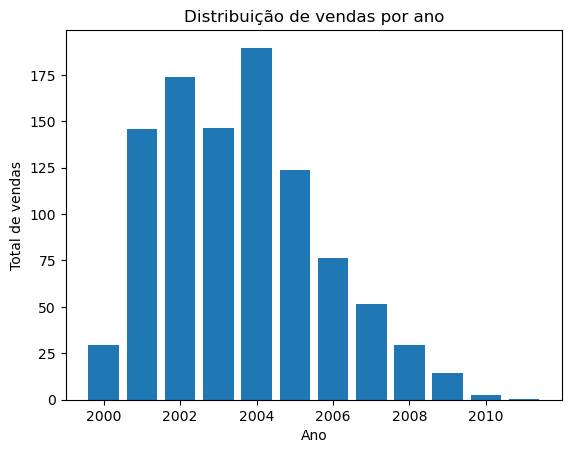

In [38]:
plt.bar(ps2_pivot_table['year_of_release'], ps2_pivot_table['total_vendas'])
plt.title('Distribuição de vendas por ano')
plt.xlabel('Ano')
plt.ylabel('Total de vendas')
plt.show()

Na plataforma PS2, vimos que ela teve início em 2000, e as vendas alavancaram nos anos seguintes. O pico de vendas ocorreu em 2004; no entanto, após 2004, as vendas começaram a cair, e o último registro de venda se deu em 2011.

In [39]:
X360 = df.query('platform in "X360"')
X360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


In [40]:
X360_pivot_table = X360.pivot_table(index = 'year_of_release', values = 'total_vendas', aggfunc = 'sum')
X360_pivot_table = X360_pivot_table.reset_index().sort_values(by = 'total_vendas', ascending=False)
X360_pivot_table

,year_of_release,total_vendas
5,2010,159.00
6,2011,130.54
3,2008,129.31
4,2009,111.64
7,2012,96.25
2,2007,89.39
8,2013,75.36
1,2006,48.92
9,2014,31.34
10,2015,8.31


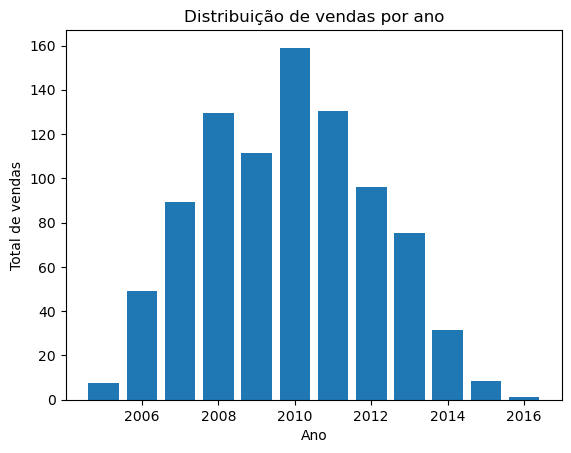

In [41]:
plt.bar(X360_pivot_table['year_of_release'], X360_pivot_table['total_vendas'])
plt.title('Distribuição de vendas por ano')
plt.xlabel('Ano')
plt.ylabel('Total de vendas')
plt.show()

Na plataforma X360, observamos que ela teve início em 2005 e as vendas cresceram nos anos seguintes. O pico de vendas ocorreu em 2011; no entanto, após 2011, as vendas começaram a cair até o ano de 2016.

In [42]:
PS3 = df.query('platform in "PS3"')
PS3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


In [43]:
PS3_pivot_table = PS3.pivot_table(index = 'year_of_release', values = 'total_vendas', aggfunc = 'sum')
PS3_pivot_table = PS3_pivot_table.reset_index().sort_values(by = 'total_vendas', ascending=False)
PS3_pivot_table

,year_of_release,total_vendas
5,2011,135.74
4,2010,127.85
3,2009,119.32
2,2008,110.10
7,2013,103.46
6,2012,95.87
1,2007,68.52
8,2014,35.97
0,2006,19.62
9,2015,11.09


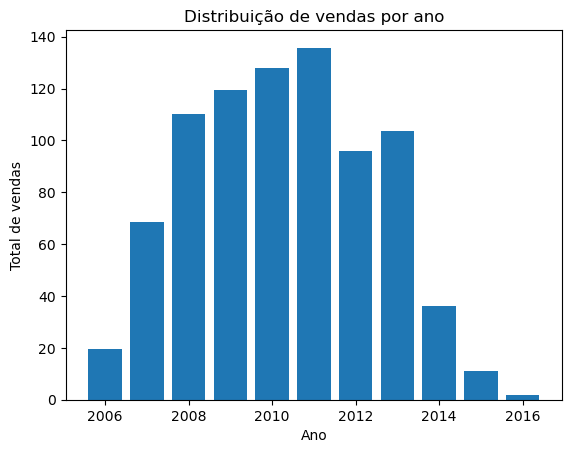

In [44]:
plt.bar(PS3_pivot_table['year_of_release'], PS3_pivot_table['total_vendas'])
plt.title('Distribuição de vendas por ano')
plt.xlabel('Ano')
plt.ylabel('Total de vendas')
plt.show()

Na plataforma PS3, vimos que ela teve início em 2006, e as vendas alavancaram nos anos seguintes. Entre 2011, as vendas praticamente se mantiveram estáveis. No entanto, após o pico de vendas em 2011, houve uma pequena queda em 2012 e 2013. A partir de 2014, as vendas caíram drasticamente e seguiram caindo até 2016.

Assim, analisando essas três plataformas, vimos que a PS2 era popular no início dos anos 2000, mas desapareceu em 2011. Já as outras duas plataformas surgiram em períodos próximos, mas em 2016 ambas já não tinham grandes vendas. Podemos concluir que as plataformas levam aproximadamente 10 anos para aparecerem, atingirem um pico de vendas e desaparecerem. São nesses 10 anos que o jogador conhece a plataforma, se adapta a ela, há um equilíbrio, e muito provavelmente, com o surgimento de uma nova plataforma, a antiga desaparece.

**Escolhendo de um periodo para análise**

Para melhor direcionar o estudo, determinamos que, baseados nas respostas anteriores, os anos de 2015 e 2016 são os mais relevantes, pois são mais recentes. Assim, iremos agora analisar apenas os dados referentes a esse período, desconsiderando os dados de anos anteriores. Com o período selecionado, iremos analisar quais plataformas venderam mais. 

In [45]:
ano_analise = df.loc[df['year_of_release'] > 2014]
ano_analise.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,T,7.17
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,M,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,M,4.62


In [46]:
ano_filtrado = ano_analise.groupby('platform')['total_vendas'].sum()
ano_filtrado = ano_filtrado.sort_values(ascending=False)
ano_filtrado

platform
PS4     138.90
XOne     68.65
WiiU     18.65
3DS      13.52
PS3      12.72
PC       12.28
X360      9.50
PSV       4.06
Name: total_vendas, dtype: float64

**Plataformas que estão liderando em vendas**

Analisaremos quais plataformas estão liderando em vendas e  quais estão crescendo ou diminuindo. Para isso selecionamos as plataformas PS4, XOne e 3DS analisarmos, pois parecem ser potencialmente lucrativas.

In [47]:
PS4 = ano_analise.query('platform in "PS4"')
PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,T,7.17
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,M,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,M,4.62


In [48]:
PS4_pivot_table = PS4.pivot_table(index = 'year_of_release', values = 'total_vendas', aggfunc = 'sum')
PS4_pivot_table = PS4_pivot_table.reset_index().sort_values(by = 'total_vendas', ascending=False)
PS4_pivot_table

,year_of_release,total_vendas
0,2015,81.16
1,2016,57.74


In [49]:
XOne = ano_analise.query('platform in "XOne"')
XOne.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,M,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,T,4.22
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65


In [50]:
XOne_pivot_table = XOne.pivot_table(index = 'year_of_release', values = 'total_vendas', aggfunc = 'sum')
XOne_pivot_table = XOne_pivot_table.reset_index().sort_values(by = 'total_vendas', ascending=False)
XOne_pivot_table

,year_of_release,total_vendas
0,2015,44.83
1,2016,23.82


In [51]:
plat_3DS = ano_analise.query('platform in "3DS"')
plat_3DS.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
457,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,0.12,66.0,6.9,E,3.05
677,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89.0,9.0,M,2.34
1596,Pokemon Super Mystery Dungeon,3DS,2015,Role-Playing,0.48,0.35,0.34,0.08,69.0,8.8,T,1.25
1817,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,0.53,0.33,0.17,0.08,73.0,7.6,M,1.11
2219,Kirby: Planet Robobot,3DS,2016,Action,0.28,0.14,0.47,0.04,81.0,8.7,M,0.93


In [52]:
plat_3DS_pivot_table = plat_3DS.pivot_table(index = 'year_of_release', values = 'total_vendas', aggfunc = 'sum')
plat_3DS_pivot_table = plat_3DS_pivot_table.reset_index().sort_values(by = 'total_vendas', ascending=False)
plat_3DS_pivot_table

,year_of_release,total_vendas
0,2015,11.20
1,2016,2.32


Analisando os anos de 2015 e 2016 e as três plataformas que seriam potencialmente lucrativas, pudemos verificar que, apesar de serem as mais lucrativas nesses dois últimos anos, essas plataformas não estão crescendo; na verdade, estão diminuindo.

**Diagrama de caixa**

Construiremos um diagrama de caixa para as vendas globais de todos os jogos divididos por plataforma.

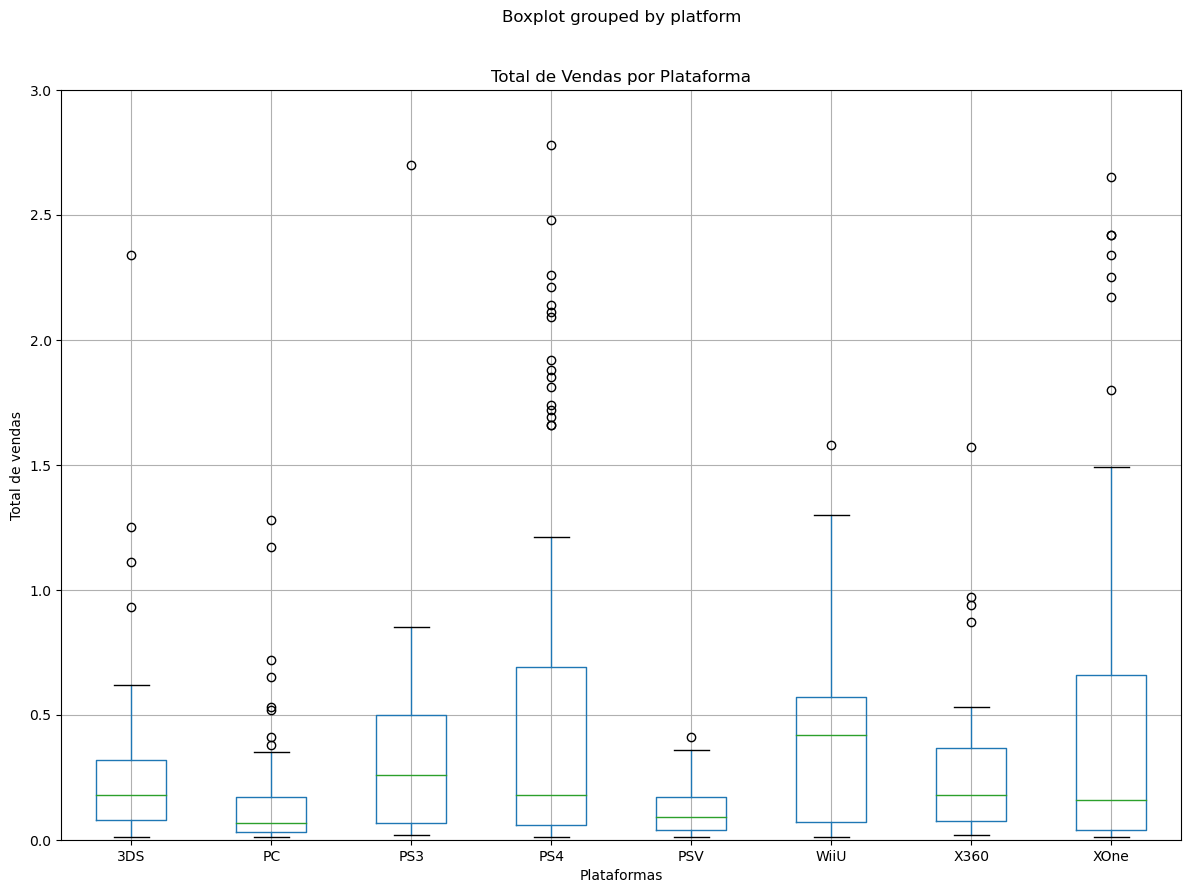

In [53]:
ano_analise.boxplot(column='total_vendas', by='platform', figsize=(14,10))
plt.title('Total de Vendas por Plataforma')
plt.ylim(0,3)
plt.xlabel('Plataformas')
plt.ylabel('Total de vendas')
plt.show()

Pudemos ver que não só há diferenças nas vendas, mas também, ao observar a mediana (linha verde) e a variação dos dados (presentes nos bigodes), as diferenças são significativas.

**As vendas médias em várias plataformas**

In [54]:
media_vendas = ano_analise.groupby('platform')['total_vendas'].mean()
media_vendas = media_vendas.sort_values(ascending=False)
media_vendas

platform
PS4     0.731053
WiiU    0.643103
XOne    0.567355
3DS     0.409697
PS3     0.363429
X360    0.306452
PC      0.146190
PSV     0.112778
Name: total_vendas, dtype: float64

Na análise das vendas médias em várias plataformas, observamos que a plataforma PS4 teve a maior média de vendas totais, com 0,625083 unidades vendidas em média por jogo, seguida pela plataforma XOne, com uma média de 0,516707 unidades vendidas por jogo. A última plataforma listada é a PSP, com uma média de vendas totais de 0,04 unidades por jogo.

**Avaliações de usuários e profissionais e as vendas de uma plataforma popular**

Iremos agora analisar como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular e para isso selecionaremos a plataforma PS4.

Text(0, 0.5, 'Total de vendas')

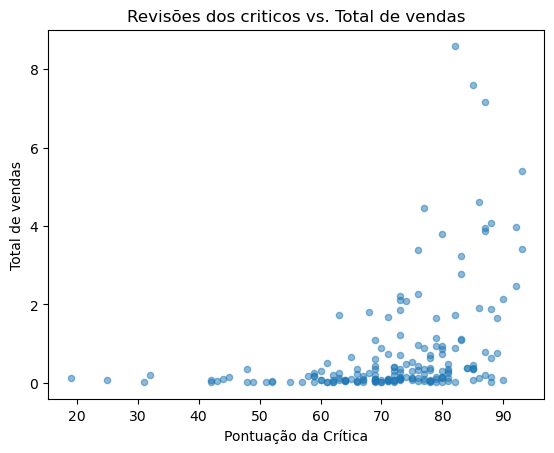

In [55]:
PS4.plot.scatter(x='critic_score', y='total_vendas', alpha=0.5)
plt.title('Revisões dos criticos vs. Total de vendas')
plt.xlabel('Pontuação da Crítica')
plt.ylabel('Total de vendas')

In [56]:
critic_vendas = PS4['critic_score'].corr(PS4['total_vendas'])
print(f"A correlação entre revisões e vendas é: {critic_vendas}")

A correlação entre revisões e vendas é: 0.3920741369660568


A correlação entre revisões e vendas é de 0.39 indica uma correlação positiva e significaria que há uma tendência de que quando o número de revisões aumenta, as vendas também aumentam.

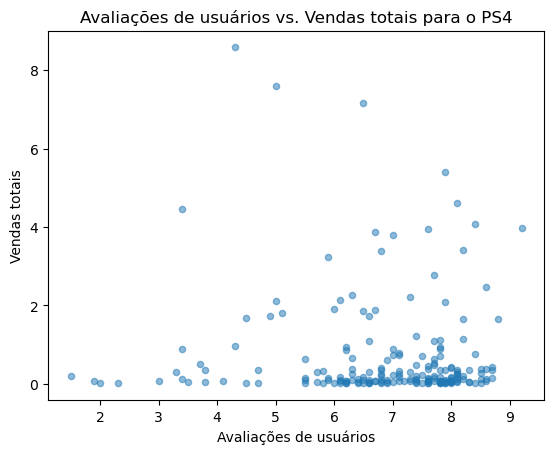

In [57]:
plt.scatter(x=PS4['user_score'], y=PS4['total_vendas'], s=20, alpha=0.5)
plt.title('Avaliações de usuários vs. Vendas totais para o PS4')
plt.xlabel('Avaliações de usuários')
plt.ylabel('Vendas totais')
plt.show()

In [58]:
user_vendas = PS4['user_score'].corr(PS4['total_vendas'])
print(f"A correlação entre revisões e vendas é: {user_vendas}")

A correlação entre revisões e vendas é: -0.05973845712638215


A correlação entre revisões e vendas é de -0.059 e indica uma correlacao negativa e significaria que há uma tendência de que quando o número de revisões aumenta, as vendas diminuem.

Assim, se observarmos apenas as avaliações dos críticos e dos usuários, poderíamos concluir que as avaliações dos críticos ajudam a aumentar as vendas, ao contrário do que acontece com as avaliações dos usuários, que tendem a diminuir as vendas.

**Vendas dos mesmos jogos em outras plataformas**

In [59]:
jogos_plataforma = ano_analise.pivot_table(index=['name', 'platform'], values='total_vendas', aggfunc = 'sum')
jogos_plataforma.head(20)

total_vendas
name                                 platform              
7 Days to Die                        PS4               0.14
                                     XOne              0.05
7th Dragon III Code: VFD             3DS               0.16
Act of Aggression                    PC                0.01
Aegis of Earth: Protonovus Assault   PS4               0.02
                                     PSV               0.03
Agatha Christie's The ABC Murders    PS4               0.02
                                     XOne              0.01
Agatha Christie: The ABC Murders     PC                0.02
Anima - Gate of Memories             PS4               0.02
Animal Crossing: Amiibo Festival     WiiU              0.42
Animal Crossing: Happy Home Designer 3DS               3.05
Anno 2205                            PC                0.26
Arslan: The Warriors of Legend       PS4               0.09
                                     XOne              0.01
Art Academy: Home Studio             WiiU              0.01
Assassin's Creed Chronicles          PS4               0.08
                                     PSV               0.07
                                     XOne              0.01
Assassin's Creed Chronicles: China   PS4               0.04

Fizemos uma pivot table para compararmos as vendas dos jogos que estão em mais de uma plataforma e pudemos ver os jogos que estão na plataforma PS4 tem mais vendas do que aqueles que estão em outras plataformas. 

**Distribuição geral de jogos por gênero**

In [60]:
vendas_por_genero = ano_analise.groupby('genre')['total_vendas'].sum()
vendas_por_genero = vendas_por_genero.sort_values(ascending=False)
vendas_por_genero

genre
Action          71.45
Shooter         64.66
Sports          62.82
Role-Playing    31.87
Fighting        11.20
Misc             8.90
Platform         6.94
Racing           6.73
Simulation       5.73
Adventure        5.62
Strategy         2.27
Puzzle           0.09
Name: total_vendas, dtype: float64

Olhando apenas a soma das vendas totais de jogos de cada gênero, podemos concluir que os três gêneros mais lucrativos são: Shooter, Action e Sports. No entanto, não podemos generalizar as vendas altas e baixas, pois não sabemos o preço de cada jogo no mercado. Seria melhor analisar cada jogo individualmente para avaliar sua lucratividade, já que o lucro pode variar de acordo com o jogo e não apenas com o gênero. Portanto, não seria a melhor opção generalizar a lucratividade como alta ou baixa com base no gênero de um jogo.

# Criando um perfil de usuário para cada região

Para ajudar nosso estudo iremos criar um perfil de usuario por cada região que possuem as maiores vendas, que são a região Norte Americana, Europeia e Japonesa. Para criar o perfil observaremos:
- as 5 plataformas principais e as variações das suas quotas de mercado de região para região;
- os cinco principais gêneros
- e se as classificações do ESRB afetam as vendas em regiões individuais

**Regiao Norte America(AN)**

In [61]:
na_platform = ano_analise.groupby('platform')['na_sales'].sum()
na_platform = na_platform.sort_values(ascending=False)
na_platform

platform
PS4     47.19
XOne    40.03
WiiU     7.94
X360     5.70
3DS      4.93
PS3      4.22
PC       3.49
PSV      0.46
Name: na_sales, dtype: float64

In [62]:
na_genre = ano_analise.groupby('genre')['na_sales'].sum()
na_genre = na_genre.sort_values(ascending=False)
na_genre

genre
Shooter         29.36
Action          28.25
Sports          26.13
Role-Playing    12.15
Fighting         5.25
Misc             4.49
Platform         2.96
Adventure        1.99
Racing           1.91
Simulation       0.79
Strategy         0.68
Puzzle           0.00
Name: na_sales, dtype: float64

In [63]:
na_genree = ano_analise.groupby('rating')['eu_sales'].sum()
na_genre = na_genree.sort_values(ascending=False)
na_genre

rating
M    56.12
E    39.11
T    16.56
Name: eu_sales, dtype: float64

**Regiao Europeia (EU)**

In [64]:
eu_platform = ano_analise.groupby('platform')['eu_sales'].sum()
eu_platform = eu_platform.sort_values(ascending=False)
eu_platform 

platform
PS4     63.74
XOne    22.35
PC       7.92
WiiU     5.72
PS3      5.02
3DS      3.30
X360     2.93
PSV      0.81
Name: eu_sales, dtype: float64

In [65]:
eu_genre = ano_analise.groupby('genre')['eu_sales'].sum()
eu_genre = eu_genre.sort_values(ascending=False)
eu_genre

genre
Action          29.16
Sports          27.26
Shooter         24.28
Role-Playing    11.80
Racing           4.00
Fighting         3.38
Simulation       3.04
Adventure        2.68
Misc             2.66
Platform         2.13
Strategy         1.38
Puzzle           0.02
Name: eu_sales, dtype: float64

In [66]:
eu_genre = ano_analise.groupby('rating')['eu_sales'].sum()
eu_genre = eu_genre.sort_values(ascending=False)
eu_genre

rating
M    56.12
E    39.11
T    16.56
Name: eu_sales, dtype: float64

**Regiao Japonesa(JP)**

In [67]:
jp_platform = ano_analise.groupby('platform')['jp_sales'].sum()
jp_platform = jp_platform.sort_values(ascending=False)
jp_platform

platform
PS4     6.46
3DS     4.52
WiiU    3.67
PSV     2.41
PS3     1.70
XOne    0.14
PC      0.00
X360    0.00
Name: jp_sales, dtype: float64

In [68]:
jp_genre = ano_analise.groupby('genre')['jp_sales'].sum()
jp_genre = jp_genre.sort_values(ascending=False)
jp_genre

genre
Action          5.16
Role-Playing    4.39
Shooter         3.09
Simulation      1.56
Platform        1.29
Fighting        1.12
Sports          0.98
Misc            0.82
Adventure       0.27
Racing          0.12
Puzzle          0.07
Strategy        0.03
Name: jp_sales, dtype: float64

In [69]:
jp_genre = ano_analise.groupby('rating')['jp_sales'].sum()
jp_genre = jp_genre.sort_values(ascending=False)
jp_genre

rating
M    8.52
T    5.54
E    4.84
Name: jp_sales, dtype: float64

Sobre as 5 plataformas principais e as variações de suas quotas de mercado de região para região, temos:
- Para região NA - PS4, XOne, WiiU, X360, 3DS
- Para região EU - PS4, XOne, PC, WiiU, PS3
- Para região JP - PS4, 3DS, WiiU, PSV, PS3

As regiões praticamente têm as mesmas cinco plataformas principais, variando apenas pela ausência da XOne e pela presença da PSV na região japonesa. Vimos que a plataforma PS4 está em primeiro em todas as regiões, enquanto as demais plataformas ocupam diferentes posições conforme a região.

Sobre os cinco principais gêneros em cada região, temos:

- Para região NA - Shooter, Action, Sports, Role-Playing, Fighting
- Para região EU - Action, Sports, Shooter, Role-Playing, Racing
- Para região JP - Action, Role-Playing, Shooter, Simulation, Platform

Todas as regiões têm os mesmos três gêneros principais: Shooter, Action e Role-Playing, variando apenas a posição de preferência. Já os outros dois gêneros dependem de cada região. A diferença provavelmente se deve às preferências dos usuários de cada região.

Por fim, quanto aos ratings, o M (Mature) pode ser considerado o preferido entre os usuários de todas as regiões. Há diferenças na preferência entre o gênero T (Teen) e E (Everyone). A classificação pode afetar as vendas em regiões individuais, pois as classificações podem influenciar as decisões de compra dos consumidores.

# Testando Hipóteses

Com os dados analisados, agora iremos testar duas hipóteses. Abaixo, testaremos a hipótese sobre as classificações médias dos usuários das plataformas Xbox One e PC, bem como para os gêneros Action (Ação) e Sports (Esportes).

Sobre a classificações médias dos usuários das plataformas Xbox One e PC formulamos da seguinte forma:
- Hipótese nula: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
- Hipótese alternativa: As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

In [70]:
alpha = 0.05

sample_1 = ano_analise[ano_analise['platform'].str.contains('XOne')]
sample_2 = ano_analise[ano_analise['platform'].str.contains('PC')]  
results = st.ttest_ind(sample_1['user_score'], sample_2['user_score'], equal_var = False, nan_policy='omit')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print ("Rejeitamos a hipótese nula")
else:
    print ("Nós não podemos rejeitar a hipótese nula")

p-value:  0.2946308864003345
Nós não podemos rejeitar a hipótese nula


Como resultado da primeira hipótese testada nao pudemos rejeitar a hipótese nula, ou seja, assumimos que não há diferença signitivativa entre as classificações médias dos usuários das plataformas Xbox One e PC, sendo então as mesmas.

Já para sobre as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) formulamos da seguinte forma:

- Hipótese nula: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas.
- Hipótese alternativa: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [71]:
alpha = 0.05

sample_1 = ano_analise[ano_analise['genre'].str.contains('Action')]
sample_2 = ano_analise[ano_analise['genre'].str.contains('Sports')]  
results = st.ttest_ind(sample_1['user_score'], sample_2['user_score'], equal_var = False, nan_policy='omit')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print ("Rejeitamos a hipótese nula")
else:
    print ("Nós não podemos rejeitar a hipótese nula")

p-value:  5.97163549920592e-10
Rejeitamos a hipótese nula


Na segunda hipótese testada temos rejeitamos a hipótese nula, ou seja, assumimos que há diferença signitivativa entre as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes), sendo assim, diferentes. 

Na primeira hipótese, definimos que, se o resultado do p-value fosse menor que o valor do alpha, não rejeitaríamos a hipótese nula. Já na segunda hipótese, definimos que, se o valor p fosse menor que o nível de significância de 0,05 (alpha), rejeitaríamos a hipótese nula; caso contrário, não rejeitaríamos a hipótese nula.

Portanto, concluimos que:

- As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
- As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

# Conclusão

No presente estudo, buscamos identificar os jogos que mais vendem na loja online Ice para planejar a campanha publicitária para o próximo ano. Visamos analisar as avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos que estão disponíveis em fontes abertas, identificando padrões que determinam se um jogo tem sucesso ou não.

Quando analisamos os dados, pudemos perceber a quantidade de jogos lançados em cada ano, mas havia muitos dados que não seriam pertinentes ao nosso estudo. Assim, decidimos fazer uma primeira análise das vendas das principais plataformas.

Analisando as principais plataformas, decidimos escolher as plataformas PS2, X360 e PS3, pois eram as que possuíam as maiores vendas totais. Constatamos que as plataformas levam aproximadamente 10 anos para aparecerem, atingirem um pico de vendas e desaparecerem.

Para melhor direcionar o estudo, determinamos que, baseados na análise anterior, os anos de 2015 e 2016 seriam os mais relevantes, pois eram mais recentes e ajudariam a analisar os dados desse período. Com essa análise filtrada, vimos que as plataformas PS4, XOne e 3DS pareciam ser potencialmente lucrativas. No entanto, observamos que as vendas dessas plataformas estavam diminuindo em vez de crescer.

Analisando o gráfico de caixa para as vendas globais de todos os jogos, divididos por plataforma, pudemos ver que as diferenças nas vendas são significativas. Quanto às vendas médias em várias plataformas, observamos que a plataforma PS4 teve a maior média de vendas totais, seguida pela plataforma XOne, com a PSP figurando em último lugar.

Na análise da correlação entre as avaliações dos críticos e usuários e o total de vendas, concluímos que as avaliações dos críticos tendem a aumentar as vendas, enquanto as avaliações dos usuários podem ter o efeito oposto, diminuindo as vendas.

Ainda, ao comparar as vendas de jogos que estão em mais de uma plataforma, pudemos ver que os jogos disponíveis na plataforma PS4 têm mais vendas do que aqueles disponíveis em outras plataformas.

Na análise da distribuição geral de jogos por gênero, concluímos que Shooter, Action e Sports são os gêneros mais lucrativos. No entanto, acreditamos que não seria a melhor opção generalizar a lucratividade com base apenas no gênero, pois o lucro pode variar de acordo com o jogo específico e não apenas com o gênero.

Sobre o perfil do usuário para as regiões Norte-Americana, Europeia e Japonesa, observamos que a plataforma mais popular entre elas era a PS4, o rating mais popular era M (Mature) e os gêneros Shooter, Action e Role-Playing eram os únicos que estavam entre os cinco primeiros em todas as três regiões.

Quando testamos as hipóteses, concluímos que:
- As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
- As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Assim, podemos concluir que, apesar da plataforma PS4 estar enfrentando uma diminuição nas vendas, continua sendo a plataforma mais popular. Portanto, deve-se focar em jogos com rating M e gêneros Shooter, Action e Role-Playing.

